##**Трекер настроения с элементами дневника**

Проанализируем полученные данные и проведем над нами аналитику с помощью модулей *pandas* и *matplotlib*. В конце подведем итог, почему данный проект полезен и какую он может принести пользу.



---



##Шаг 0
Импортируем модули pandas, matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

##Шаг 1

Добавим файл с данными, полученный ранее.


In [ ]:
import json
import requests

url = "https://raw.githubusercontent.com/dlm1u/python-project/main/generation/mood_data.json"
data = requests.get(url).json()

#Преобразуем данные в таблицу и создаем Dataframe

rows = []
for user in data["users"]:
  for mood in user["moods"]:
    rows.append({
        "user_id": user["user_id"],
        "name": user["name"],
        "gender": user["gender"],
        "age": user["age"],
        "date": mood["date"],
        "mood_score": mood["mood_score"],
        "emoji": mood["mood_emoji"]
    })
df = pd.DataFrame(rows)
df['date'] =pd.to_datetime(df['date'])
df.head()



,user_id,name,gender,age,date,mood_score,emoji
0,1,Anna,female,16,2025-10-10,3,😐
1,1,Anna,female,16,2025-10-11,2,😔
2,1,Anna,female,16,2025-10-12,1,😭
3,1,Anna,female,16,2025-10-13,2,😔
4,1,Anna,female,16,2025-10-14,2,😔


##Шаг 2
Анализируем данные и создаем графики


---



#Гистограмма зависимости настроения от возраста


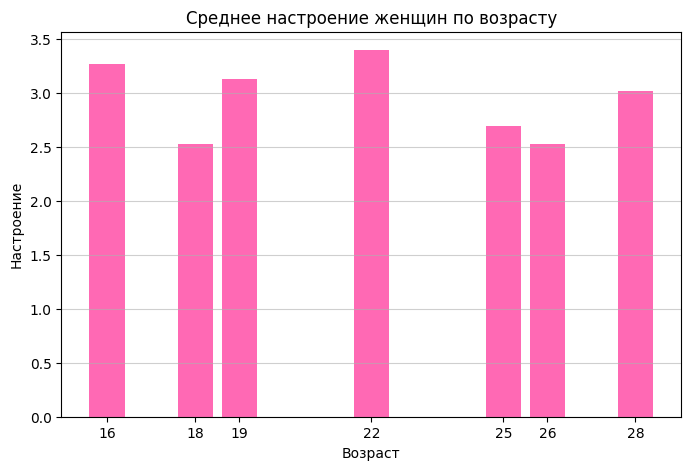

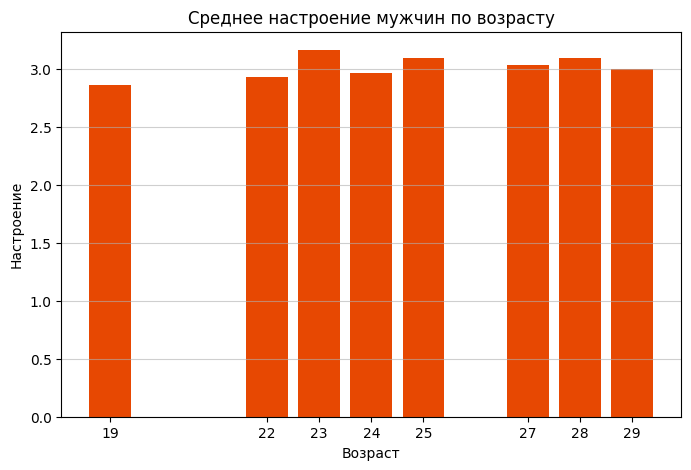

In [ ]:
age_gender = df.groupby(["age", "gender"])["mood_score"].mean().unstack()

female = age_gender["female"].dropna()

plt.figure(figsize=(8, 5))
plt.bar(female.index, female.values, color="#FF69B4")

plt.title("Среднее настроение женщин по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Настроение")

plt.xticks(female.index)
plt.grid(axis="y", alpha=0.6)

plt.show()

male = age_gender["male"].dropna()

plt.figure(figsize=(8, 5))
plt.bar(male.index, male.values, color="#e74802")

plt.title("Среднее настроение мужчин по возрасту")
plt.xlabel("Возраст")
plt.ylabel("Настроение")

plt.xticks(male.index)
plt.grid(axis="y", alpha=0.6)

plt.show()


Анализируя гистограмму, получили, что настроение с возрастом демонстрирует U-образную форму. Оно относительно высокое в молодости, снижается в среднем возрасте (период "кризиса" или наибольшей нагрузки) и снова повышается в более зрелые годы.

Ключевое различие между полами:


*   У женщин пик настроения в молодости выражен сильнее, чем у мужчин. Однако спад в среднем возрасте у них также более резкий и глубокий.
*   У мужчин кривая настроения более сглаженная. Спад в среднем возрасте не такой глубокий, как у женщин, а последующий рост в зрелости — более стабильный и выраженный.

Итог: В то время как и мужчины, и женщины переживают спад настроения в середине жизни, женщины испытывают более сильные эмоциональные колебания, тогда как мужчины демонстрируют более устойчивую, хотя и менее "яркую", динамику на протяжении жизни.

#График зависимости среднего настроения мужчин и женщин по дням


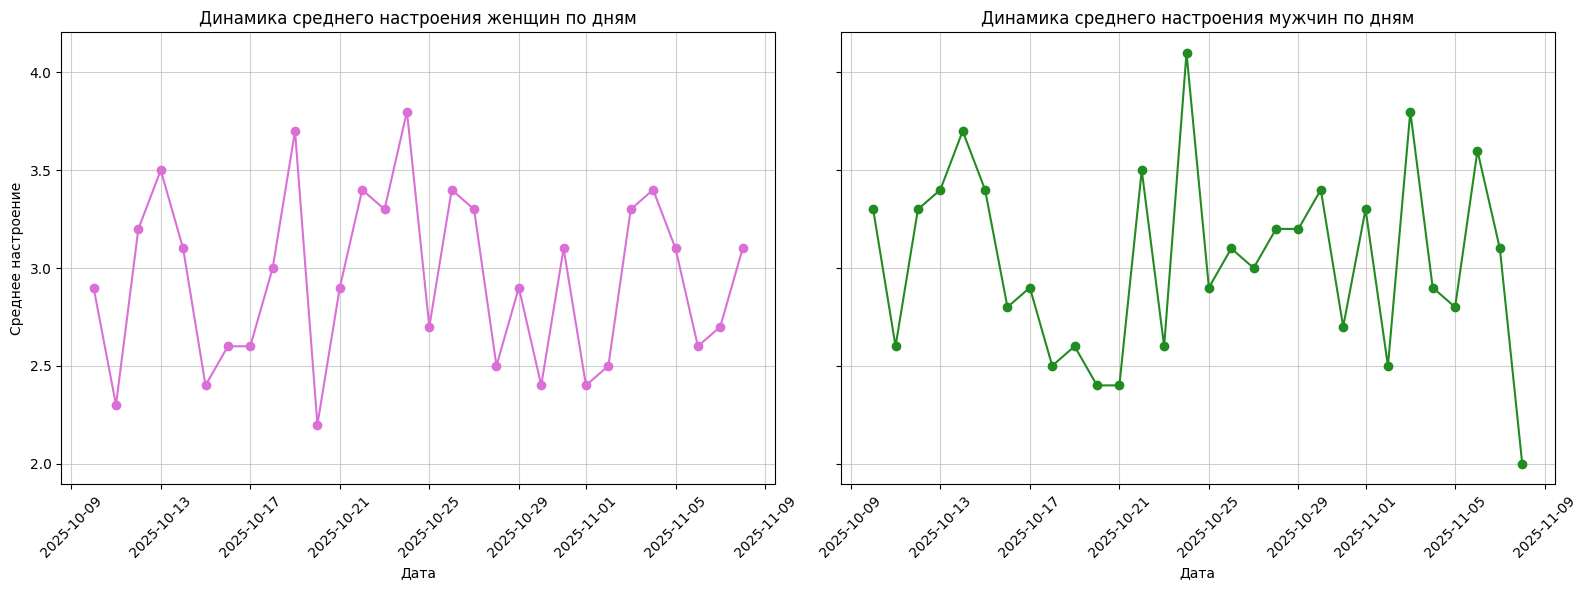

In [ ]:
daily_gender = df.groupby(["date", "gender"])["mood_score"].mean().unstack()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].plot(daily_gender.index, daily_gender["female"], marker="o", color="#da70d6")
axes[0].set_title("Динамика среднего настроения женщин по дням")
axes[0].set_xlabel("Дата")
axes[0].set_ylabel("Среднее настроение")
axes[0].grid(True, alpha=0.6)
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(daily_gender.index, daily_gender["male"], marker="o", color="#228b22")
axes[1].set_title("Динамика среднего настроения мужчин по дням")
axes[1].set_xlabel("Дата")
axes[1].grid(True, alpha=0.6)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



На основе графиков можно сделать выводы, что в среднем, женщины демонстрируют более стабильное настроение, а настроение мужчин более вариативное(наблюдаются резкие скачки и падения)

В некоторые дни у мужчин более высокое среднее настроение, чем у женщин, но одновременно у них сильнее выражены резкие спады.

Женщины в целом находятся в более предсказуемом эмоциональном диапазоне, тогда как мужчины подвержены более резким изменениям настроения.



---

Сравнив первый и второй графики, получаем, что, исходя из предоставленных данных, мужчины более эмоциональны, если рассматривать отдельные дни, но на протяжении жизни у них состояние стабильнее, чем у женщин.


#Гистограмма самых частых эмоций

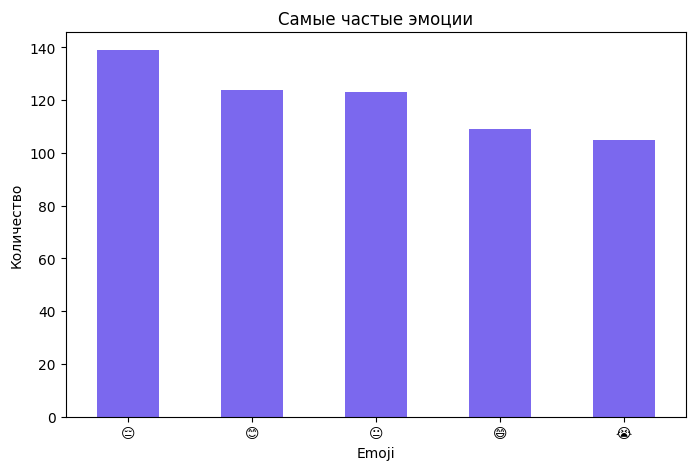

In [ ]:
emoji_counts = df["emoji"].value_counts()

plt.figure(figsize=(8, 5))
emoji_counts.plot(kind="bar", color="#7b68ee")
plt.title("Самые частые эмоции")
plt.xlabel("Emoji")
plt.ylabel("Количество")

plt.xticks(rotation=0)
plt.show()

Исходя из полученной гистограммы, можно сделать вывод, что большинство пользователей зачастую находятся *в печальном состоянии* на момент фиксирования своего настроения. На это могут влиять разные факторы. У каждого пользователя есть свои причины, разбор которых может *улучшить их настроение*.

Но также многие пользователи отмечают хорошее эмоциональное состояние, что не может не радовать.



---




# Обоснование полезности проекта
На основе проведённого анализа данных можно подвести итоги и сделать следующие выводы о пользе трекера настроения:
---

### 1. Самоконтроль и понимание себя
- Пользователь может регулярно отслеживать своё эмоциональное состояние, фиксировать настроение и события, которые на него влияют.
- Это помогает выявлять закономерности, триггеры и факторы, влияющие на эмоциональный фон, и при необходимости предпринимать шаги для улучшения самочувствия.
- Благодаря функциям записи пользователь может следить за тем, что именно повлияло на его настроение, это делает анализ состояния более точным и осознанным.

---

### 2. Улучшение психического здоровья
Ведение дневника настроения способствует формированию привычки заботиться о себе и отслеживать эмоциональные изменения. Нам кажется, что настроение меняется само собой, без особых причин. Но это не совсем так. С помощью трекера пользователь сможет понять, что именно влияет на его самосостояние.

А Регулярный контроль настроения позволяет своевременно замечать изменения в эмоциональном состоянии и предотвращать негативные последствия стресса или усталости.

---

### 3. Польза для научного анализа
- Данные, собираемые трекером, могут быть использованы для изучения психоэмоциональных закономерностей в разных группах людей.
- Проект предоставляет возможности для анализа влияния возраста, пола и внешних факторов на эмоциональное состояние, что делает его ценным инструментом для психологических и социологических исследований.

---

**Вывод:** трекер настроения с элементами дневника помогает пользователю понимать и контролировать своё эмоциональное состояние, выявлять закономерности и триггеры, а также служит полезным инструментом для научного анализа психоэмоциональных данных. Проект способствует улучшению психического здоровья и повышает осознанность пользователя в отношении своих эмоций.

